In [3]:
import argparse
import numpy as np
import pandas as pd
import os
import time
current_directory = os.getcwd()
print(current_directory)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import warnings

/Users/damienlo/Desktop/University/CS 334/Project


# FCNN

In [9]:
FCNN_gender = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/FCNN_HyperParamLog_Gen.csv')
FCNN_age = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/FCNN_HyperParamLog_Age.csv')

## FCNN_gender

In [11]:
FCNN_gender

,lr,h1,h2,batch_size,num_epochs,epoch_acc,decay,dropout,acc,std,time,complexity
0,0.0100,128,128,64,10,"{0: [0.7824812167857798], 1: [0.79428780858137...",0.000100,0.1,0.788201,0.001560,385.684316,256
1,0.0100,128,32,64,20,"{0: [0.7754129689258881], 1: [0.78698395245948...",0.000100,0.2,0.788242,0.001582,474.860130,160
2,0.0100,256,64,128,10,"{0: [0.7712243776015079], 1: [0.78745516898348...",0.000010,0.3,0.788242,0.001582,340.014405,320
3,0.0100,128,128,32,10,"{0: [0.7831618628759915], 1: [0.78698395245948...",0.000010,0.3,0.788242,0.001582,241.945704,256
4,0.0001,128,128,32,10,"{0: [0.7661457106206969], 1: [0.80538757559098...",0.000100,0.3,0.852203,0.002461,244.164884,256
5,0.0010,128,128,32,20,"{0: [0.7849943715804079], 1: [0.81483808476661...",0.000010,0.2,0.842318,0.002386,425.999861,256
6,0.0010,512,64,64,10,"{0: [0.7812769967800204], 1: [0.80303149297102...",0.000001,0.3,0.827343,0.011058,378.062277,576
7,0.0001,256,128,64,10,"{0: [0.7807796015602503], 1: [0.81486426346239...",0.000100,0.3,0.851889,0.000986,239.870029,384
8,0.0001,512,32,128,10,"{0: [0.7861724128903897], 1: [0.81593758998926...",0.000100,0.2,0.853167,0.001410,250.891714,544
9,0.0010,256,32,64,20,"{0: [0.7804392785151444], 1: [0.81502133563705...",0.000100,0.1,0.839868,0.001752,435.096958,288


In [53]:
FCNN_gender.sort_values(by='acc', ascending=False)
best_params_gen = FCNN_gender.iloc[0,:]
best_params_gen.to_dict()

{'lr': 0.01,
 'h1': 128,
 'h2': 128,
 'batch_size': 64,
 'num_epochs': 10,
 'epoch_acc': '{0: [0.7824812167857798], 1: [0.7942878085813765], 2: [0.789732715516113], 3: [0.7917746537867484], 4: [0.7919055472656352], 5: [0.7865912720228279], 6: [0.787088667242598], 7: [0.7871148459383753], 8: [0.7867221655017147], 9: [0.7864341998481635]}',
 'decay': 0.0001,
 'dropout': 0.1,
 'acc': 0.7882005374318958,
 'std': 0.001559591,
 'time': 385.6843161582947,
 'complexity': 256}

{'lr': 0.0001,
 'h1': 512,
 'h2': 256,
 'batch_size': 64,
 'num_epochs': 23,
 'decay': 0.0001,
 'dropout': 0.1,
 'complexity': 256}

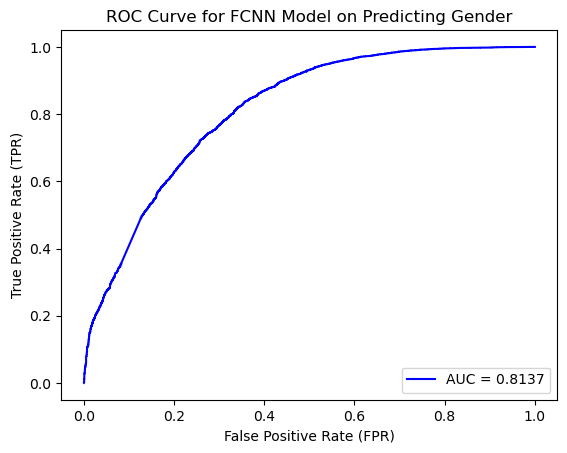

In [39]:
# ROC Curve
FCNN_roc = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/FCNN_roc.csv')
FCNN_roc
plt.plot(FCNN_roc['fpr'], FCNN_roc['tpr'], label=f'AUC = {0.8136981706546784:.4f}', color = 'b')
plt.title("ROC Curve for FCNN Model on Predicting Gender")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
{'lr': 0.0001, 'h1': 512, 'h2': 256, 'batch_size': 64, 'num_epochs': 23, 'decay': 0.0001, 'dropout': 0.1, 'complexity': 256}

## FCNN_age

In [53]:
FCNN_age = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/FCNN_HyperParamLog_Age.csv')
FCNN_age

,lr,h1,h2,batch_size,num_epochs,decay,dropout,MSE,std,time,complexity
0,0.0001,256,64,32,20,0.000100,0.3,566.717383,114.464325,3582.352373,320
1,0.0001,128,64,128,20,0.000001,0.3,571.838293,115.339241,214.172139,192
2,0.0010,512,64,64,20,0.000010,0.1,568.533844,116.804242,2104.211530,576
3,0.0100,512,128,128,20,0.000100,0.2,616.221252,117.251174,1277.306802,640
4,0.0001,256,64,64,10,0.000010,0.3,566.434650,116.878765,329.385717,320
5,0.0100,512,64,128,20,0.000001,0.1,607.792175,116.807017,643.929841,576
6,0.0100,256,64,64,10,0.000001,0.3,603.933038,116.353506,236.451055,320
7,0.0001,128,32,128,10,0.000001,0.3,579.291150,116.998204,142.836775,160
8,0.0010,256,128,128,10,0.000100,0.2,600.921661,105.424856,199.559354,384
9,0.0010,128,128,64,20,0.000001,0.1,582.501703,109.262789,368.033425,256


In [49]:
FCNN_age.sort_values(by='MSE', ascending=False)
best_params_age = FCNN_age.iloc[0,:]
best_params_age.to_dict()

{'lr': 0.0001,
 'h1': 256.0,
 'h2': 64.0,
 'batch_size': 32.0,
 'num_epochs': 20.0,
 'decay': 0.0001,
 'dropout': 0.3,
 'MSE': 566.7173828,
 'std': 114.46432493682072,
 'time': 3582.3523733615875,
 'complexity': 320.0}

# RESFCNN

{'lr': 0.001,
 'h1': 128,
 'h2': 32,
 'batch_size': 128,
 'num_epochs': 10,
 'decay': 1e-06,
 'dropout': 0.1}

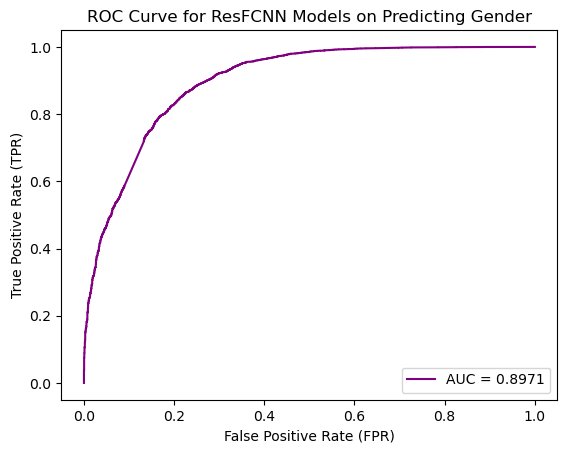

In [60]:
# ROC Curve
ResFCNN_roc = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/ResNetFCNN/ResNetFCNN_roc.csv')
ResFCNN_roc
plt.plot(ResFCNN_roc['fpr'], ResFCNN_roc['tpr'], label=f'AUC = {0.8970769648978402:.4f}', color = 'purple')
plt.title("ROC Curve for ResFCNN Models on Predicting Gender")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
0.8970769648978402
{'lr': 0.001, 'h1': 128, 'h2': 32, 'batch_size': 128, 'num_epochs': 10, 'decay': 1e-06, 'dropout': 0.1}

{'lr': 0.0001,
 'h1': 512,
 'h2': 256,
 'batch_size': 64,
 'num_epochs': 23,
 'decay': 0.0001,
 'dropout': 0.1,
 'complexity': 256}

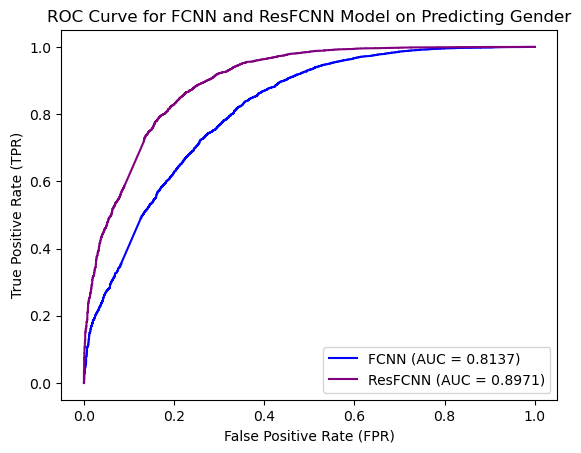

In [68]:
# ROC Curve
FCNN_roc = pd.read_csv('/Users/damienlo/Desktop/University/CS 334/Project/ModelRunFiles/FCNN/FCNN_roc.csv')
FCNN_roc
plt.plot(FCNN_roc['fpr'], FCNN_roc['tpr'], color='b', 
         label=f'FCNN (AUC = {0.8137:.4f})')
# Plot ResFCNN ROC
plt.plot(ResFCNN_roc['fpr'], ResFCNN_roc['tpr'], color='purple', 
         label=f'ResFCNN (AUC = {0.8971:.4f})')
plt.title("ROC Curve for FCNN and ResFCNN Model on Predicting Gender")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
{'lr': 0.0001, 'h1': 512, 'h2': 256, 'batch_size': 64, 'num_epochs': 23, 'decay': 0.0001, 'dropout': 0.1, 'complexity': 256}